In [10]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import pandas
import matplotlib.pyplot as plt

boston_data = load_boston()
# target

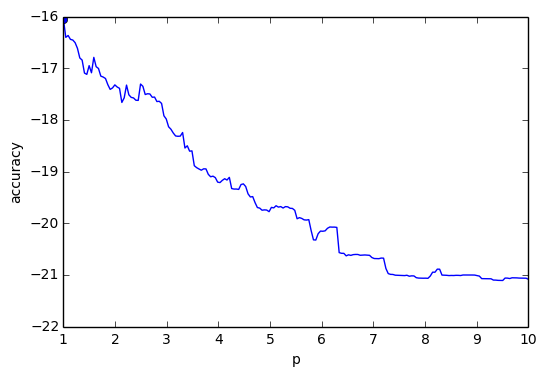

In [51]:
data = boston_data.data
data = scale(data)
target = boston_data.target
kf = KFold(len(data), n_folds=5, shuffle=True, random_state=42)

accuracy_scaled = []  
for p_koef in np.linspace(1, 10, num=200):
    neigh = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=p_koef)
    a = cross_val_score(estimator=neigh, X=data, y=target, cv=kf, scoring='neg_mean_squared_error')
    accuracy_scaled.append(np.mean(a))

x = np.linspace(1, 10, num=200)
plt.plot(x, accuracy_scaled, 'b')
plt.plot(np.argmax(accuracy_scaled) + 1, np.amax(accuracy_scaled), 'bo')
plt.ylabel('accuracy')
plt.xlabel('p')
# plt.axis([0, 51, 0, 1])
plt.show()